# DBSCAN

## Importar librerías

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs, make_moons # datos de prueba
from sklearn.cluster import DBSCAN  # modelo DBSCAN
from sklearn.metrics import silhouette_score

## Preparando datos de prueba

In [3]:
X, y, c = make_blobs(500, cluster_std=0.8, centers=4, n_features=2,return_centers=True)

df_blobs = pd.DataFrame(
    {
        'x1': X[:,0],
        'x2': X[:,1]
    }
)

df_centers = pd.DataFrame(
    {
        'x1': c[:,0],
        'x2': c[:,1],
    }
)


In [4]:
# datos en forma de media luna

X_m ,y_m = make_moons(n_samples=250, noise=0.05, random_state=42)

df_moons = pd.DataFrame(
    {
        'x1': X_m[:,0],
        'x2': X_m[:,1]
    }
    )

## Visualización de datos

Visualizamos los datos de df_blobs

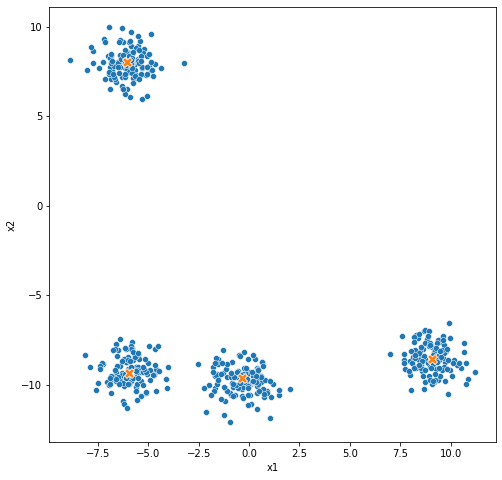

In [5]:
# tamano del grafico
fig = plt.figure(figsize=(8,8))
# grafico de los datos df_blobs
sns.scatterplot(data=df_blobs, x='x1', y='x2')
sns.scatterplot(data=df_centers, x='x1', y='x2', marker='X', s=100)
plt.plot()
plt.show()

Visualizamos los datos de df_moons

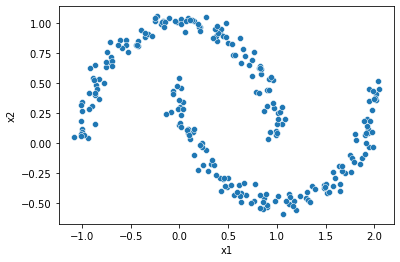

In [6]:
sns.scatterplot(data=df_moons, x='x1', y='x2')
plt.show()

> Aplicar K-Means en estos datos no funciona debido a que no presenta forma esferica

## Implementando DBSCAN

In [7]:
# definimos el modelo con sus respectivos parametros
dbscan_cluster = DBSCAN(eps=0.3, min_samples=3)

# generamos la prediccion con los datos de las medias lunas
y_m_predict = dbscan_cluster.fit_predict(X_m)

# agregamos las predicciones al dataframe d_moons
df_moons['cluster'] = y_m_predict

Visualizamos los datos de la media luna pero esta vez haciendo una segmentacion con la prediccion

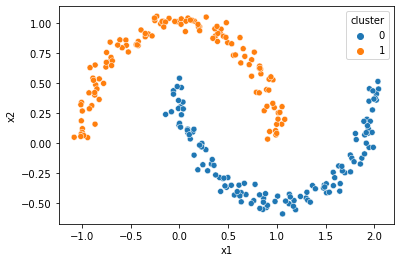

In [8]:
sns.scatterplot(data=df_moons, x='x1', y='x2', hue='cluster')
plt.show()

> El modelo logra separar los dos clusteres de manera correcta. La clave fue la eleccion correcta de los hiperparametros

Vamos a aplicar DBSCAN en los datos de df_blobs para ver como el algoritmo resuelve este tipo de problemas.

In [9]:
# definimos el modelo y sus respectivos hiperparametros
dbscan = DBSCAN(eps=1, min_samples=4)

# generamos la prediccion usando los datos esfericos
y_predict = dbscan.fit_predict(X)

# agregamos las predicciones al dataframe
df_blobs['cluster'] = y_predict

Visualizamos los datos esfericos pero esta vez con una segmentacion dada por las predicciones

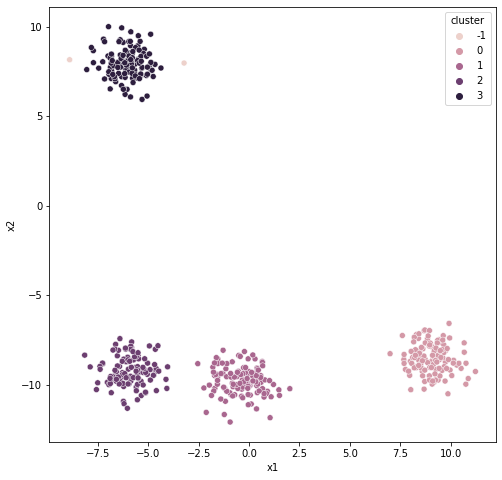

In [10]:
# tamano del grafico
fig = plt.figure(figsize=(8,8))
# grafico de los datos df_blobs
sns.scatterplot(data=df_blobs, x='x1', y='x2', hue='cluster')
plt.plot()
plt.show()

> El modelo logra identificar 3 clusteres. Une dos clusteres debido a que comparten puntos

> El cluster negativo indica el ruido que hay en los datos

## Hyperparameters

In [11]:
# importamos vecinos mas cercanos
from sklearn.neighbors import NearestNeighbors

Para encontrar el valor optimo de _n_neighbord_ no hay formula magica, pero si podemos seguir la siguiente recomendacion: Se considera el numero de dimensiones de los puntos y se multiplica por 2.

En este caso, son 2 dimensiones, por tanto seria 4. Pero probemos con 3 ya que no es una ciencia exacta.

In [12]:
# encontrar los vecinos mas cercanos de cada punto
neighbors = NearestNeighbors(n_neighbors=3)

# ajustamos el objeto a los datos
neighbors_fit = neighbors.fit(X)

# obtenemos las distancias de cada punto junto a su respectivo indice
distance, index = neighbors_fit.kneighbors(X)

In [13]:
# Cada punto presenta 3 vecinos mas cercanos que estan representados por sus distancias
distance

array([[0.        , 0.16435997, 0.17786996],
       [0.        , 0.31646025, 0.34229181],
       [0.        , 0.02993574, 0.20980244],
       ...,
       [0.        , 0.1313417 , 0.21056723],
       [0.        , 0.13140251, 0.18844056],
       [0.        , 0.10715047, 0.32258651]])

A partir de las distancias calculadas anteriormente, podemos calcular el epsilon optimo. Para ello, vamos a graficar las distancias ordenadas pero esta vez solo los puntos con la distancia mas cercana.

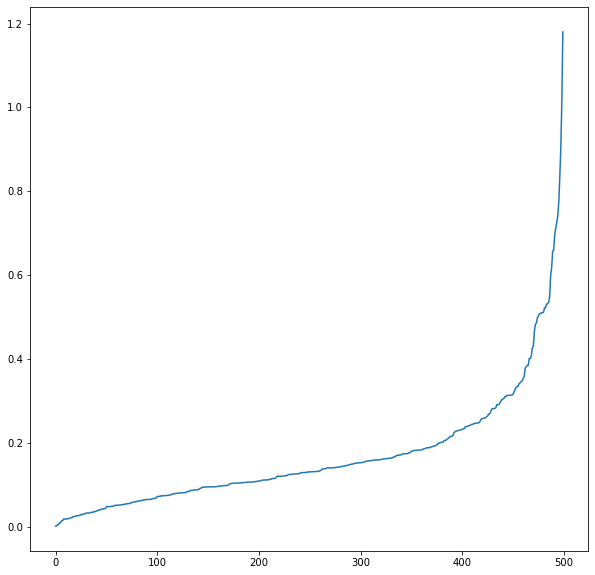

In [14]:
# ordenamos las distancias
distances = np.sort(distance, axis=0)

# Tomar solo los puntos mas cercanos
distances = distances[:,1]

# graficamos los puntos seleccionados
fig = plt.figure(figsize=(10,10))
plt.plot(distances)

- Seleccionamos al area de puntos donde inicia en ascenso rapido. En este caso indica los valores que estan entre 0.2 y 0.4. Estos son el rango de valores que se van a probar como epsilon optimo 

- Esta tecnica se conoce como la tecnica de la rodilla.

- Permite hacernos una idea del epsilon que debemos configurar. Ahora, con este valor, mas el valor del vecinos minimos, pasamos a configurar DBSCAN.

In [15]:
# definimos el rango de epsilon a iterar
eps_values = np.arange(0.25, 0.8, 0.10)

# definimos el rango de vecinos mas cercanos a iterar
min_samples = np.arange(2,10)

In [16]:
print(eps_values)
print(min_samples)

[0.25 0.35 0.45 0.55 0.65 0.75]
[2 3 4 5 6 7 8 9]


Convertimos los valores a iterar en una matriz

In [17]:
from itertools import product

# lista con el producto de valores a iterar
dbscan_param = list(product(eps_values, min_samples))
dbscan_param

[(0.25, 2),
 (0.25, 3),
 (0.25, 4),
 (0.25, 5),
 (0.25, 6),
 (0.25, 7),
 (0.25, 8),
 (0.25, 9),
 (0.35, 2),
 (0.35, 3),
 (0.35, 4),
 (0.35, 5),
 (0.35, 6),
 (0.35, 7),
 (0.35, 8),
 (0.35, 9),
 (0.44999999999999996, 2),
 (0.44999999999999996, 3),
 (0.44999999999999996, 4),
 (0.44999999999999996, 5),
 (0.44999999999999996, 6),
 (0.44999999999999996, 7),
 (0.44999999999999996, 8),
 (0.44999999999999996, 9),
 (0.5499999999999999, 2),
 (0.5499999999999999, 3),
 (0.5499999999999999, 4),
 (0.5499999999999999, 5),
 (0.5499999999999999, 6),
 (0.5499999999999999, 7),
 (0.5499999999999999, 8),
 (0.5499999999999999, 9),
 (0.6499999999999999, 2),
 (0.6499999999999999, 3),
 (0.6499999999999999, 4),
 (0.6499999999999999, 5),
 (0.6499999999999999, 6),
 (0.6499999999999999, 7),
 (0.6499999999999999, 8),
 (0.6499999999999999, 9),
 (0.7499999999999999, 2),
 (0.7499999999999999, 3),
 (0.7499999999999999, 4),
 (0.7499999999999999, 5),
 (0.7499999999999999, 6),
 (0.7499999999999999, 7),
 (0.7499999999999999

Procedemos a iterar sobre cada combinacion de parametros dados 

In [18]:
# lista para almacenar el score de silueta
sil_scoure = []

for p in dbscan_param:
    y_pred = DBSCAN(eps=p[0], min_samples=p[1]).fit_predict(X)
    sil_scoure.append(silhouette_score(X, y_pred))

In [22]:
sil_scoure[:5]

[-0.021414109510558204,
 -0.057432811854135,
 -0.08514264186766775,
 -0.20518539145004297,
 -0.2696306381256135]

Graficamos los coeficientes de silueta

In [23]:
# dataframe con los hiperparametros
df_params_tunning = pd.DataFrame.from_records(dbscan_param, columns=['Eps', 'Min_Samples'])
df_params_tunning

,Eps,Min_Samples
0,0.25,2
1,0.25,3
2,0.25,4
3,0.25,5
4,0.25,6
5,0.25,7
6,0.25,8
7,0.25,9
8,0.35,2
9,0.35,3


Agregamos al dataframe, los valores correspondiente de coeficiente de silueta

In [24]:
df_params_tunning['Sil_Scores'] = sil_scoure
df_params_tunning

,Eps,Min_Samples,Sil_Scores
0,0.25,2,-0.021414
1,0.25,3,-0.057433
2,0.25,4,-0.085143
3,0.25,5,-0.205185
4,0.25,6,-0.269631
5,0.25,7,-0.413827
6,0.25,8,-0.581299
7,0.25,9,-0.630466
8,0.35,2,0.086240
9,0.35,3,0.231504


Convertimos el dataframe en una estructura matricial

In [27]:
pivot_data = pd.pivot_table(df_params_tunning, values='Sil_Scores', index='Min_Samples', columns='Eps')
pivot_data

Eps,0.25,0.35,0.45,0.55,0.65,0.75
Min_Samples,,,,,,
2,-0.021414,0.086240,0.150828,0.216349,0.278762,0.792618
3,-0.057433,0.231504,0.417851,0.463393,0.477363,0.792618
4,-0.085143,0.089619,0.545973,0.600107,0.616030,0.786524
5,-0.205185,0.137635,0.522302,0.592408,0.615050,0.778917
6,-0.269631,0.075394,0.586220,0.684463,0.706241,0.762511
7,-0.413827,0.052111,0.455096,0.679216,0.702439,0.756280
8,-0.581299,-0.007279,0.413936,0.668048,0.686799,0.756280
9,-0.630466,0.061389,0.470595,0.657066,0.681215,0.748680


## Evaluación de DBSCAN